In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [79]:
ess_combined_2012_2014 = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")


ess_combined_2012_2014.info()
ess_combined_2012_2014['year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


7    4076
6    4071
Name: year, dtype: int64

In [32]:
ess_combined_2012_2014.groupby(['cntry']).agg(['count'])

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
,count,count,count,count,count,count,count,count,count,count,count,count
cntry,,,,,,,,,,,,
CH,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
CZ,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207
DE,27,27,27,27,27,27,27,27,27,27,27,27
ES,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
NO,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420
SE,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726


1.  DID  PEOPLE BECOME LESS TRUSTING FROM 2012 TO 2014?
    --split dataframe for 2012 and 2014
    ppltrst
    

In [77]:
ess_2012 = ess_combined_2012_2014[ess_combined_2012_2014['year']== 6]
ess_2012.info()
ess_2012.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 7279
Data columns (total 13 columns):
cntry      4071 non-null object
idno       4071 non-null int64
year       4071 non-null int64
tvtot      4071 non-null int64
ppltrst    4071 non-null int64
pplfair    4071 non-null int64
pplhlp     4071 non-null int64
happy      4071 non-null int64
sclmeet    4071 non-null int64
sclact     4071 non-null int64
gndr       4071 non-null int64
agea       4071 non-null int64
partner    4071 non-null int64
dtypes: int64(12), object(1)
memory usage: 445.3+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
7275,SE,3729,6,1,5,5,7,7,7,4,2,15,2
7276,SE,3732,6,3,3,7,7,5,6,2,2,16,2
7277,SE,3743,6,4,6,6,5,7,6,4,1,15,2
7278,SE,3744,6,0,6,7,2,9,7,3,2,15,2
7279,SE,3746,6,7,5,10,6,10,3,2,2,15,2


In [24]:
ess_2014 = ess_combined_2012_2014[ess_combined_2012_2014['year'] == 7]
ess_2014.info()
ess_combined_2014.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 732 to 8146
Data columns (total 13 columns):
cntry      4076 non-null object
idno       4076 non-null int64
year       4076 non-null int64
tvtot      4076 non-null int64
ppltrst    4076 non-null int64
pplfair    4076 non-null int64
pplhlp     4076 non-null int64
happy      4076 non-null int64
sclmeet    4076 non-null int64
sclact     4076 non-null int64
gndr       4076 non-null int64
agea       4076 non-null int64
partner    4076 non-null int64
dtypes: int64(12), object(1)
memory usage: 445.8+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2


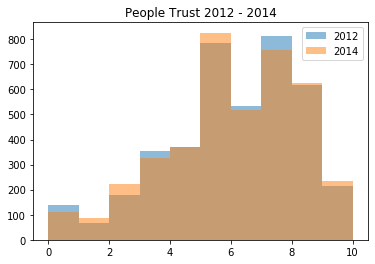

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [27]:
plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha = .5)
plt.legend(['2012','2014'])
plt.title('People Trust 2012 - 2014')
plt.show()

print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))

In [80]:
print(stats.shapiro(ess_2012['ppltrst']))
print(stats.shapiro(ess_2014['ppltrst']))

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


In [34]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

THERE IS NO STATISTICAL SIGNIFICANCE AND THE NULL HYPOTHESIS IS TRUE BECAUSE THE TTEST IS ONLY .14 WHICH IS NOT GREATER THAN 1.96 AND THE PVALUE IS NOT < .05 .

2.  DID PEOPLE BECOME HAPPIER FROM 2012 TO 2014?

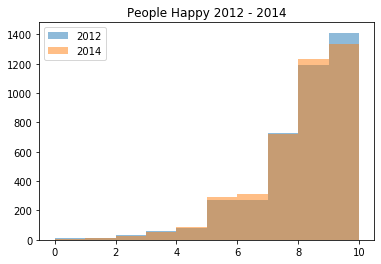

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [35]:
plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)
plt.legend(['2012','2014'])
plt.title('People Happy 2012 - 2014')
plt.show()

print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

In [36]:
stats.ttest_ind(ess_2012['happy'], ess_2014['happy'])

Ttest_indResult(statistic=1.2074597686358974, pvalue=0.2272901912283969)

In [38]:
stats.kruskal(ess_2012['happy'],ess_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
    Are there differences, and if so, which countries stand out?

In [40]:
ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013527326648>,
      dtype=object)

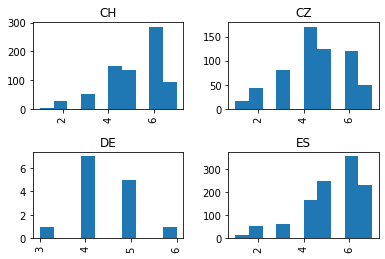

In [42]:
unique_country = ['CH', 'CZ', 'DE', 'ES']
unique_country_2014 = ess_2014[ess_2014['cntry'].isin(unique_country)] 

unique_country_2014['cntry'].unique()

unique_country_2014['sclmeet'].hist(by = unique_country_2014 ['cntry'])

In [45]:
stats.kruskal(unique_country_2014.loc[unique_country_2014 ['cntry'] == 'CH', ['sclmeet']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'CZ', ['sclmeet']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'DE', ['sclmeet']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'ES', ['sclmeet']])


KruskalResult(statistic=131.71067637166595, pvalue=2.314201415479699e-28)

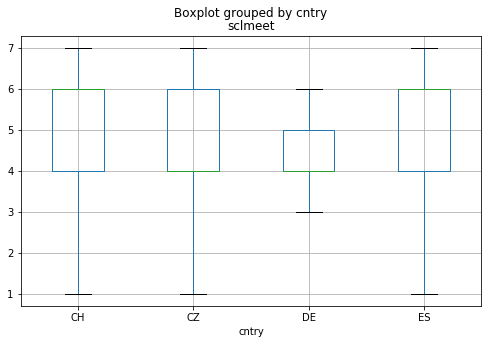

In [49]:
unique_country_2014.boxplot('sclmeet', by='cntry', figsize=(8,5))

THE DE IS DIFFERENT COMPARED TO OTHER COUNTRIES.  DE HAS A DIFFERENT MEDIAN AS COMPARED WITH THE OTHER 3 COUNTRIES IN THE STUDY. DE MEDIAN STANDS BETWEEN 5-4 WHILE THE REST OF THE COUNTRIES STANDS FROM 6-4.

Pick three or four of the countries in the sample and compare how often people took part in social activities, 
relative to others their age, in 2014.Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013527738E48>,
      dtype=object)

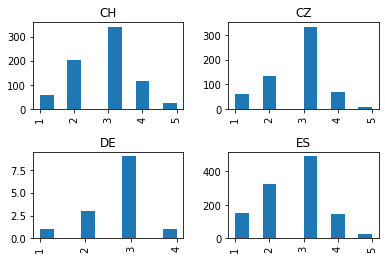

In [50]:
unique_country_2014['sclact'].hist(by = unique_country_2014['cntry'])

In [52]:
stats.f_oneway(unique_country_2014.loc[unique_country_2014 ['cntry'] == 'CH', ['sclact']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'CZ', ['sclact']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'DE', ['sclact']],
              unique_country_2014.loc[unique_country_2014 ['cntry'] == 'ES', ['sclact']])

F_onewayResult(statistic=array([4.4857456]), pvalue=array([0.00380436]))

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = unique_country_2014['sclact'],
                         groups = unique_country_2014['cntry'],
                         alpha = 0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.6634,-0.1836,0.073,False
CH,DE,-0.0704,0.9,-0.7026,0.5619,False
CH,ES,-0.1533,0.0021,-0.2639,-0.0426,True
CZ,DE,-0.0151,0.9,-0.6486,0.6185,False
CZ,ES,-0.098,0.142,-0.2159,0.0199,False
DE,ES,-0.0829,0.9,-0.7131,0.5473,False


THERE IS NO STATISTICAL SIGNIFICANCE AMONG THE STUDY GROUP.  THE HISTOGRAM SHOWS NO NORMAL DISTRIBUTION AMONG THE STUDY COUNTRIES
AND THE TUKEY STATISTICS EXHIBIT NEGATIVE MEDIAN DIFFERENCE.

RUFF FIGURAL FLUENCY TEST

1.  Is there a significant difference in the number of unique designs
    drawn by the same participants from Measurement 2 to Measurement 3?

In [55]:
ruff_test = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")

ruff_test.info()
ruff_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
Casenr           7545 non-null int64
Age              7545 non-null int64
Gender           7545 non-null object
Education        7545 non-null object
Measurement      7545 non-null object
Unique           7545 non-null float64
Perseverative    7545 non-null float64
Interval         7545 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [63]:
ruff_test_unique = ruff_test.pivot(index ='Casenr', columns ='Measurement', values ='Unique')
ruff_test_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


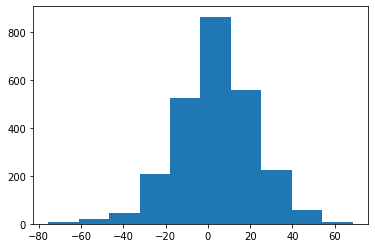

In [66]:
plt.hist(ruff_test_unique['Measurement 3 (2008-2012)'] - ruff_test_unique['Measurement 2 (2006-2008)'])
print(stats.describe(ruff_test_unique['Measurement 3 (2008-2012)'] - ruff_test_unique['Measurement 2 (2006-2008)']))

In [67]:
stats.ttest_rel(ruff_test_unique['Measurement 3 (2008-2012)'], ruff_test_unique['Measurement 2 (2006-2008)'])

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

THERE IS STATISTICAL SIGNIFICANCE.  THE HISTOGRAM SHOWS A BELL CURVE WITH SKEWNESS AND KUROTOSIS ALMOST CLOSE TO 1.

2.  Is there a significant difference in the number of perseverative errors drawn by the same participants 
    from Measurement 2 to Measurement 3?

In [69]:
ruff_test_perseverative = ruff_test.pivot(index='Casenr', columns='Measurement', values='Perseverative')
ruff_test_perseverative.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

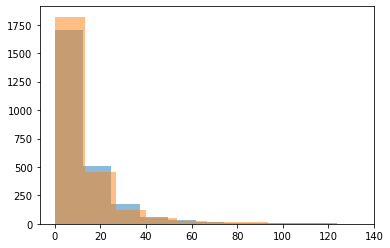

In [70]:
plt.hist(ruff_test_perseverative['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(ruff_test_perseverative['Measurement 2 (2006-2008)'], alpha = .5)

In [71]:
stats.wilcoxon(ruff_test_perseverative['Measurement 3 (2008-2012)'], ruff_test_perseverative['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

THERE IS A SIGNIFICANT DIFFERENCE AS THE SKEWNESS IS ON THE POSITIVE SIDE AND THE PVALUE IS LOWER THAN .05.